# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv("../input/chocolate-bar-ratings/flavors_of_cacao.csv")

In [3]:
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


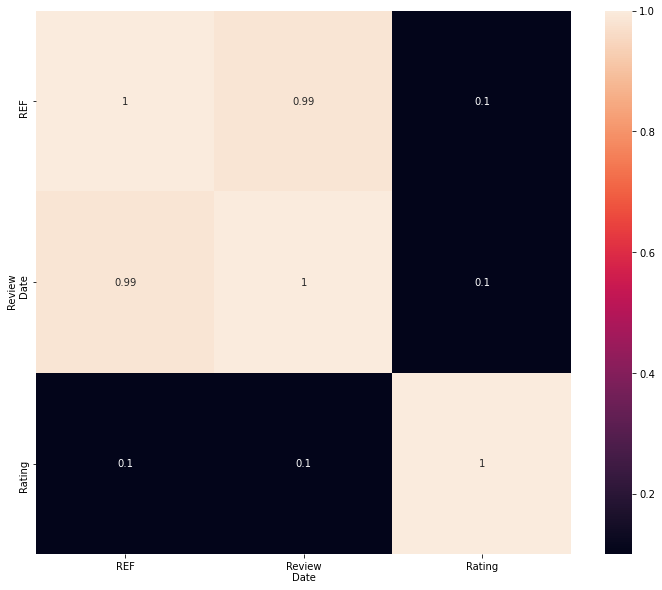

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [5]:
data.drop(['REF', 'Review\nDate'], axis=1, inplace=True)

In [6]:
data

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,3.75,,Peru
1791,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62%,Austria,3.25,,India


# Preprocesing

In [7]:
data.isnull().sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [8]:
data = data.dropna(axis=0)

In [9]:
data.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [10]:
data.columns = ['Company', 'SpecificOrigin', 'CocoaPercent', 'Location', 'Rating', 'BeanType', 'BroadOrigin']

In [11]:
data

,Company,SpecificOrigin,CocoaPercent,Location,Rating,BeanType,BroadOrigin
0,A. Morin,Agua Grande,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,,Togo
2,A. Morin,Atsane,70%,France,3.00,,Togo
3,A. Morin,Akata,70%,France,3.50,,Togo
4,A. Morin,Quilla,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,3.75,,Peru
1791,Zotter,Congo,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62%,Austria,3.25,,India


In [12]:
def removePercents(data):
    return data.apply(lambda x: float(x.strip('%')) / 100)

In [13]:
data['CocoaPercent'] = removePercents(data['CocoaPercent'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
len(data['SpecificOrigin'].unique())

1038

In [15]:
categorical_features = ['Company', 'SpecificOrigin', 'Location', 'BeanType', 'BroadOrigin']

In [16]:
def onehot_encode(data, columns):
    for column in columns:
        dummies = pd.get_dummies(data[column])
        data = pd.concat([data, dummies], axis=1)
        data.drop(column, axis=1, inplace=True)
    return data

In [17]:
data = onehot_encode(data, categorical_features)

In [18]:
y = data['Rating']
X = data.drop('Rating', axis=1)

In [19]:
X

,CocoaPercent,A. Morin,AMMA,Acalli,Adi,Aequare (Gianduja),Ah Cacao,Akesson's (Pralus),Alain Ducasse,Alexandre,...,Venezuela,"Venezuela, Carribean","Venezuela, Dom. Rep.","Venezuela, Ghana","Venezuela, Java","Venezuela, Trinidad",Venezuela/ Ghana,Vietnam,West Africa,
0,0.63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1791,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1793,0.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [22]:
inputs = tf.keras.Input(shape=(1655,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
    optimizer=optimizer,
    loss='mse'
)

In [24]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1655)]            0         
_________________________________________________________________
dense (Dense)                (None, 16)                26496     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 26,785
Trainable params: 26,785
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 10
batch_size = 32

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
36/36 [==============================] - 0s 6ms/step - loss: 8.1559 - val_loss: 5.7972
Epoch 2/10
36/36 [==============================] - 0s 2ms/step - loss: 3.6318 - val_loss: 1.6193
Epoch 3/10
36/36 [==============================] - 0s 2ms/step - loss: 0.7277 - val_loss: 0.4089
Epoch 4/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2953 - val_loss: 0.3275
Epoch 5/10
36/36 [==============================] - 0s 2ms/step - loss: 0.2255 - val_loss: 0.2961
Epoch 6/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1913 - val_loss: 0.2749
Epoch 7/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1622 - val_loss: 0.2690
Epoch 8/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1403 - val_loss: 0.2613
Epoch 9/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1238 - val_loss: 0.2610
Epoch 10/10
36/36 [==============================] - 0s 2ms/step - loss: 0.1106 - val_loss: 0.2576


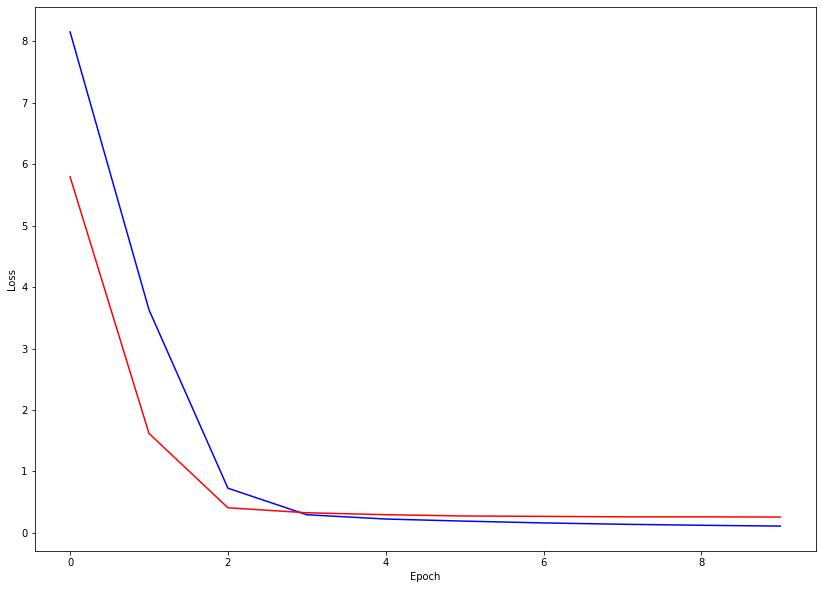

In [26]:
plt.figure(figsize=(14, 10))

plt.plot(range(epochs), history.history['loss'], color='b')
plt.plot(range(epochs), history.history['val_loss'], color='r')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [27]:
np.argmin(history.history['val_loss'])

9

In [28]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 998us/step - loss: 0.2102


0.21018393337726593